<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/tools/tools_interactive_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive visualizations and animations inside Colab Notebook

This notebook is compilation of useful code snippets and references for working with interactive visualizations. 

Text from colab help when loading libraries:


Third-party Jupyter widgets
Support for third party widgets (widgets outside of the ipywidgets package) needs to be enabled separately. Support for these widgets will be loaded from a CDN external from Colab.

```
from google.colab import output
output.enable_custom_widget_manager()
```

Support for third party widgets will remain active for the duration of the session. To disable support:

```
from google.colab import output
output.disable_custom_widget_manager()
```


In [1]:
# !pip install ipympl
# restart runtime after installing 

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

## ipyml

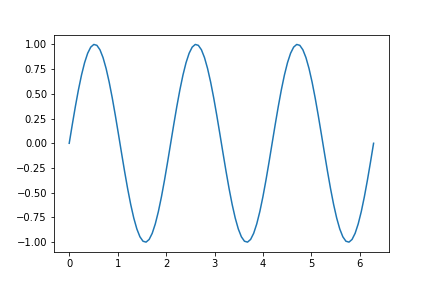

In [3]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)

## Widgets

In [8]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display

def interact_cos_compare():
    ## Plot parameters
    xmin, xmax, nx = 0.0, 10.0, 50
    ymin, ymax     = -5.0, 5.0

    ## Set up the figure and the comparison plot of y=cos(x).
    fig = plt.figure(figsize=(8,3))
    x   = linspace(xmin, xmax, nx)
    y   = cos(x)
    plt.plot(x, y, color='r', linestyle='dashed', linewidth=2, label=r"$y=\cos(x)$")
    line, = plt.plot([], [], color='k', linewidth=2, label=r"$y=A \cos(x + \phi)$")

    ## Set up the figure axes, etc.
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc="upper left")
    plt.close()

    ## Callback function: plot y=Acos(x+phi)
    def plot_cos_compare(phi, A):
        y = A*cos(x+phi)
        line.set_data(x, y)
        display(fig)

    interact(plot_cos_compare,
             phi = FloatSlider(min=-3.2, max=3.2, step=0.2, value=0.0, description="phase"),
             A   = FloatSlider(min=-5.0, max=5.0, step=0.2, value=1.2, description="amplitude"))

interact_cos_compare();

<ipython-input-8-e6fde4be1df5>:14: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x   = linspace(xmin, xmax, nx)
<ipython-input-8-e6fde4be1df5>:15: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  y   = cos(x)


interactive(children=(FloatSlider(value=0.0, description='phase', max=3.2, min=-3.2, step=0.2), FloatSlider(va…

## More widgets - polynomial

In [9]:
%matplotlib inline
from ipywidgets import interact, IntSlider, ToggleButtons, FloatRangeSlider
from numpy import linspace, exp, sign
import matplotlib.pyplot as plt
from IPython.display import display

def interact_polyn():
    ## Plot parameters
    xmin, xmax, nx = -5.0, 5.0, 100
    col0, col1     = "grey", "mediumblue"

    ## Set up the figure and the comparison plot of y=cos(x).
    fig = plt.figure(figsize=(8,3))
    ax  = fig.add_subplot(1, 1, 1)
    x   = linspace(xmin, xmax, nx)
    plt.plot([xmin, xmax], [0.0, 0.0], '--', color=col0) # guides to the eye
    line0, = plt.plot([], [], '--', color=col0)
    line1, = plt.plot([], [], color=col1, linewidth=2)

    ## Axis labels, etc.
    plt.title(r"$y = \pm x^n$")
    plt.xlim(xmin, xmax)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.close()

    ## Callback function: plot +/- x^n.
    def plot_polyn(n, sgn, yrange):
        s = 1. if sgn == '+' else -1.
        y = s * x**n
        line0.set_data([0.0, 0.0], yrange)
        line1.set_data(x, y)
        ax.set_ylim(yrange[0], yrange[1])
        display(fig)

    interact(plot_polyn,
             n      = IntSlider(min=0, max=10, value=1, description="n (power)"),
             sgn    = ToggleButtons(description='sign', options=['+', '-']),
             yrange = FloatRangeSlider(min=-50.,  max=50., step=0.5, value=[-10., 10.], description='y axis range'));

interact_polyn();

interactive(children=(IntSlider(value=1, description='n (power)', max=10), ToggleButtons(description='sign', o…

## 3D plots

In [10]:
%matplotlib notebook
from scipy import *
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation
from IPython.display import display

def interact_hyperboloid():
    ## Parameters
    rmax, nr = 3.0, 25
    phimin, phimax, nphi = -pi, pi, 40
    camz, camera_angle = 10., 30.
    col1, col2 = "cornflowerblue", "sandybrown"

    ## Initialize numerical data for the hyperboloid.
    ## First, parameterize it using polar coordinates.
    r0vec   = linspace(0.0, 1.0, nr) # Unscaled radius
    phivec  = linspace(phimin, phimax, nphi)
    r0, phi = meshgrid(r0vec, phivec)
    r0, phi = r0.flatten(), phi.flatten()
    ## Note: we triangulate the polar coordinates.  The order
    ## is preserved, so this triangulation is usable for the
    ## Cartesian plot later.
    tri = Triangulation(r0, phi).triangles

    ## Set up the 3D plot.
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_xlim3d(-rmax, rmax)
    ax.set_ylim3d(-rmax, rmax)
    ax.set_zlim3d(-pi, pi)
    ax.view_init(elev=camz, azim=camera_angle)
    plt.close()

    def plot_hyperboloid(c):
        r = r0 * (rmax - c) + c
        x, y = r*cos(phi), r*sin(phi)
        z    = sqrt(x*x + y*y - c*c + 1e-9)
        ## Plot the hyperboloid.
        ax.clear()
        ax.plot_trisurf(x, y,  z, triangles=tri, linewidth=0.1, alpha=1.0, color=col1)
        ax.plot_trisurf(x, y, -z, triangles=tri, linewidth=0.1, alpha=1.0, color=col2)
        ## Set plot axes, etc.
        ax.set_title(r"$x^2 + y^2 - z^2 = c^2$")
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$z$')
        display(fig)
        
    interact(plot_hyperboloid,
             c = FloatSlider(min=0., max=2., step=0.1, value=1.0,
                             continuous_update=False, description='Waist radius'))

interact_hyperboloid();

<ipython-input-10-2ce6e9457fc7>:19: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  r0vec   = linspace(0.0, 1.0, nr) # Unscaled radius
<ipython-input-10-2ce6e9457fc7>:20: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  phivec  = linspace(phimin, phimax, nphi)
<ipython-input-10-2ce6e9457fc7>:21: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead
  r0, phi = meshgrid(r0vec, phivec)


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Waist radius', max=2.0), Ou…

## Animation

In [4]:
%matplotlib inline
from scipy import *
import matplotlib.pyplot as plt

## Enable HTML5 video output.
from matplotlib import animation, rc
rc('animation', html='html5')

def animate_oscillation():
    amplitude, gamma, omega0 = 1.0, 0.1, 1.0 # Oscillator parameters
    tmin, tmax, nt = 0., 50., 200            # Animation parameters
    nframes, frame_dt = 100, 40
    tmin_plt, xlim = -5, 1.2                 # Axis limits
    circ_pos = -2

    ## Set up the drawing area
    fig = plt.figure(figsize=(8,4))
    plt.xlim(tmin_plt, tmax)
    plt.ylim(-xlim, xlim)

    ## Draw the static parts of the figure
    t = linspace(tmin, tmax, nt)
    x = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
    plt.plot(t, x, color='blue', linewidth=2)
    plt.title('Motion of a damped harmonic oscillator.')
    plt.xlabel('t')
    plt.ylabel('x')

    ## Initialize the plot objects to be animated (`line', `circ', `dash')
    ## with empty plot data.  They'll be used by the `animate` subroutine.
    line, = plt.plot([], [], color='grey', linewidth=2)
    circ, = plt.plot([], [], 'o', color='red', markersize=15)
    dash, = plt.plot([], [], '--', color='grey', markersize=15)
    plt.close()

    ## Initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        circ.set_data([], [])
        dash.set_data([], [])
        return line, circ, dash

    ## Animation function. This is called sequentially for different
    ## integer n, running from 0 to nframes-1 (inclusive).
    def animate(n):
        t = tmin + (tmax-tmin)*n/nframes
        line.set_data([t, t], [-xlim, xlim])        
        xc = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
        circ.set_data(circ_pos, xc)
        dash.set_data([circ_pos, t], [xc, xc])
        return line, circ, dash

    # Call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=nframes, interval=frame_dt, blit=True)
    return animator

animate_oscillation()

<ipython-input-4-4d10b65ff076>:22: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = linspace(tmin, tmax, nt)
<ipython-input-4-4d10b65ff076>:23: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  x = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
<ipython-input-4-4d10b65ff076>:23: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  x = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
<ipython-input-4-4d10b65ff076>:23: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  x = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
<ipython-input-4-4d10b65ff076>:48: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  xc = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - 

References

1) [Interactive data visualizations](https://jupyterbook.org/en/stable/interactive/interactive.html)

2) https://matplotlib.org/ipympl/

3) [Jupyter tutorial - interactive sliders](https://notebook.community/seewhydee/ntuphys_nb/jupyter_tutorial/jupyter_tutorial_02)

4) [Latex and Notebook code for Physics courses](https://github.com/seewhydee/ntuphys_nb)